# Iman Noor
---
# **🔴 Hyperparameter Tuning Techniques**

   - "Hyperparameter tuning is crucial in optimizing machine learning models for better performance and predictive accuracy."
   
Hyperparameter tuning is basically referred to as tweaking the parameters of the model, which is basically a prolonged process.
1. **Manual Search**

2. **Grid Search**
 
3. **Random Search**
 
4. **Bayesian Optimization**
 
5. **Hyperband**
  

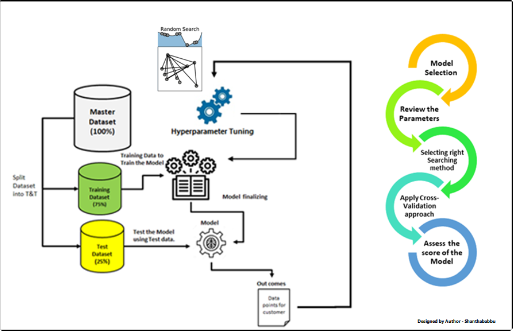

## Model Parameters:
- There are parameters that are `internally learned` from the given dataset and derived from the dataset, they are represented in making predictions, classification. These are so-called `Model Parameters`, and they are varying with respect to the nature of the data we couldn’t control this since it depends on the data.

> Some set of parameters that are used to control the behaviour of the model/algorithm and adjustable in order to obtain an improvised model with optimal performance is so-called **hyperparameter tuning** in machine learning.

> **The best model algorithm(s) will sparkle if your best choice of Hyper-parameters.**

- In one word **Hyperparameter** will be called **Configuration**.
- A quick hyperparameter is basically **Train-Test Split Ratio** in linear regression model.

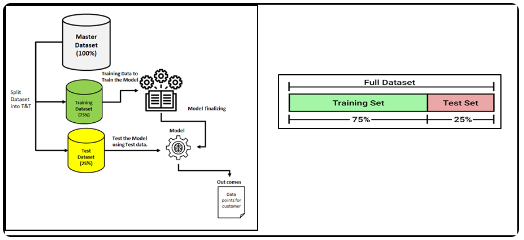

For better clarity it is defined as:
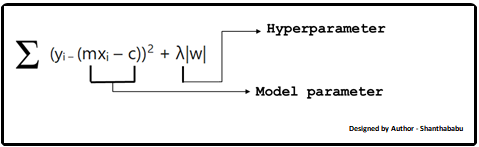

## Hyperparameter Space:

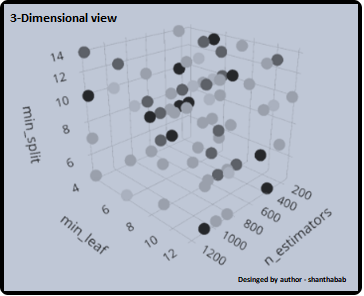


- Dataset will be splitted into 3 sets(training, testing and validation) to prevent **Data Leakage** which is basically due to following factors:
    - Data Pre-processing
    - The major root cause is doing all EDA processes before splitting the dataset into test and train
    - Doing straightforward normalizing or rescaling on a given dataset
    - Performing Min/Max values of a feature
    - Handling missing values without reserving the test and train
    - Removing outliers and Anomaly on a given dataset
    - Applying standard scaler, scaling, assert normal distribution on the full dataset
    
## **Steps to Perform Hyperparameter Tuning**

1. Firstly, select the right type of model.
2. Check the list of parameters of the model and build the HP space.
3. Find the methods for searching the HP tuning.
4. Apply the cross-validation scheme approach.
5. Assess the model score to evaluate the model.

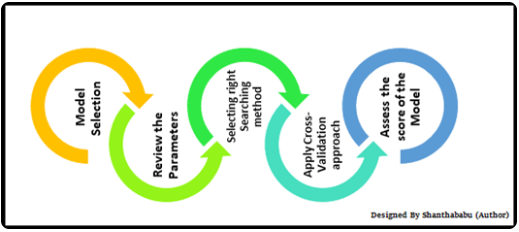

## Data Preparation

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Common Models

- *Linear Regression:* For predicting continuous values.
- *Logistic Regression:* For binary classification.
- *Decision Trees:* For classification and regression.
- *Random Forests:* For classification and regression.
- *Support Vector Machines (SVM):* For classification and regression.
- *K-Nearest Neighbors (KNN):* For classification and regression.

## **1. Manual Search**

Since we’re planning for manual search, I am creating 3 sets for DecisionTreeClassifier and fitting the model:

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [5]:
# sets of hyperparameters
params_1 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 50}
params_2 = {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 70}
params_3 = {'criterion': 'gini', 'splitter': 'random', 'max_depth': 60}

In [6]:
# Separate models
clf_1 = DecisionTreeClassifier(**params_1)
clf_2 = DecisionTreeClassifier(**params_2)
clf_3 = DecisionTreeClassifier(**params_3)
clf_1.fit(X_train, y_train)
clf_2.fit(X_train, y_train)
clf_3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=60, splitter='random')

In [7]:
# Prediction sets
preds_1 = clf_1.predict(X_test)
preds_2 = clf_2.predict(X_test)
preds_3 = clf_3.predict(X_test)
print(f'Accuracy on Model 1: {round(accuracy_score(y_test, preds_1), 3)}')
print(f'Accuracy on Model 2: {round(accuracy_score(y_test, preds_2), 3)}')
print(f'Accuracy on Model 3: {round(accuracy_score(y_test, preds_3), 3)}')

Accuracy on Model 1: 1.0
Accuracy on Model 2: 0.933
Accuracy on Model 3: 0.956


### Support Vector Machine Classifier
- The ‘kernel’ parameter specifies the type of kernel to be used in the selected algorithm. For linear classification, ‘kernel’ is set to ‘linear’, while for non-linear classification, it’s set to ‘rbf’.
- C’ represents the penalty parameter, which controls the trade-off between smooth decision boundaries and classifying training points correctly.
- ‘random_state’ is a pseudo-random number generator used to ensure reproducibility of results across different runs.

In [8]:
from sklearn.svm import SVC

In [9]:
SVC(kernel='linear', C=1.0, random_state=0)

SVC(kernel='linear', random_state=0)

## **2. Grid Search**

Grid Search exhaustively searches over a specified parameter grid to find the best combination of hyperparameters.

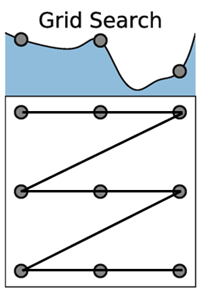

### KNN (k-Nearest Neighbors) Classifier
- n_neighbors is the number of neighbors.
- p is the Minkowski power parameter. When p = 1, it’s equivalent to the Manhattan distance, and when p = 2, it represents the Euclidean distance.

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn_clf = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

In [12]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
param_grid = {'n_neighbors': list(range(1,9)),'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute') }

In [15]:
gs = GridSearchCV(knn_clf, param_grid, cv=10)
gs.fit(X_train, y_train)

C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\anaconda\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py", line 254, in predict
    probabilities = self.predict_proba(X)
  File "C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py", line 355, in predict_proba
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\anaconda\lib\site-packages\skl

C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\anaconda\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py", line 254, in predict
    probabilities = self.predict_proba(X)
  File "C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py", line 355, in predict_proba
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\anaconda\lib\site-packages\skl

C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\anaconda\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py", line 254, in predict
    probabilities = self.predict_proba(X)
  File "C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py", line 355, in predict_proba
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\anaconda\lib\site-packages\skl

C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\anaconda\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py", line 254, in predict
    probabilities = self.predict_proba(X)
  File "C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py", line 355, in predict_proba
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\anaconda\lib\site-packages\skl

C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\anaconda\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py", line 254, in predict
    probabilities = self.predict_proba(X)
  File "C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py", line 355, in predict_proba
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\anaconda\lib\site-packages\skl

C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\anaconda\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py", line 254, in predict
    probabilities = self.predict_proba(X)
  File "C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py", line 355, in predict_proba
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\anaconda\lib\site-packages\skl

C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\anaconda\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py", line 254, in predict
    probabilities = self.predict_proba(X)
  File "C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py", line 355, in predict_proba
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\anaconda\lib\site-packages\skl

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [16]:
# Access results
results = gs.cv_results_

In [17]:
for param, mean_score in zip(results['params'], results['mean_test_score']):
    print(param, mean_score)

{'algorithm': 'auto', 'n_neighbors': 1} 0.9445454545454547
{'algorithm': 'auto', 'n_neighbors': 2} 0.9263636363636364
{'algorithm': 'auto', 'n_neighbors': 3} 0.9445454545454547
{'algorithm': 'auto', 'n_neighbors': 4} 0.9254545454545455
{'algorithm': 'auto', 'n_neighbors': 5} 0.9445454545454547
{'algorithm': 'auto', 'n_neighbors': 6} 0.9445454545454547
{'algorithm': 'auto', 'n_neighbors': 7} 0.9354545454545455
{'algorithm': 'auto', 'n_neighbors': 8} 0.9345454545454546
{'algorithm': 'ball_tree', 'n_neighbors': 1} 0.9445454545454547
{'algorithm': 'ball_tree', 'n_neighbors': 2} 0.9263636363636364
{'algorithm': 'ball_tree', 'n_neighbors': 3} 0.9445454545454547
{'algorithm': 'ball_tree', 'n_neighbors': 4} 0.9254545454545455
{'algorithm': 'ball_tree', 'n_neighbors': 5} 0.9445454545454547
{'algorithm': 'ball_tree', 'n_neighbors': 6} 0.9445454545454547
{'algorithm': 'ball_tree', 'n_neighbors': 7} 0.9354545454545455
{'algorithm': 'ball_tree', 'n_neighbors': 8} 0.9345454545454546
{'algorithm': 'k

In [18]:
# Best parameters and best score
print("Best parameters found: ", gs.best_params_)
print("Best accuracy score: ", gs.best_score_)

Best parameters found:  {'algorithm': 'auto', 'n_neighbors': 1}
Best accuracy score:  0.9445454545454547


## **3. Random Search**

Random Search searches randomly selected combinations of parameters from a specified grid.

Obviously, the number of training models are small column than grid search.

> **In simple terms, In Random Search, in a given grid, the list of hyperparameters are trained and test our model on a random combination of given hyperparameters.**

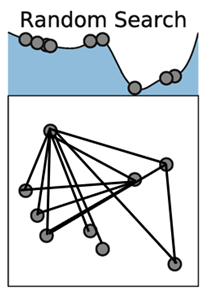

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint

In [20]:
rfc_model = RandomForestClassifier(n_estimators=50)

In [21]:
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [22]:
samples = 8  # number of random samples 
randomCV = RandomizedSearchCV(rfc_model, param_distributions=param_dist, n_iter=samples,cv=3)

In [23]:
randomCV.fit(X, y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=50),
                   n_iter=8,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D343777A60>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D343777EE0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D343777D30>})

In [24]:
# Best parameters and best score
print("Best parameters found: ", randomCV.best_params_)
print("Best accuracy score: ", randomCV.best_score_)

Best parameters found:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 7}
Best accuracy score:  0.9666666666666667


## **4. Bayesian Optimization**

Bayesian Optimization uses a probabilistic model to find the best hyperparameters. 
Bayesian Optimization is an approach that uses Bayes Theorem to direct the search in order to find the minimum or maximum of an objective function.


In [25]:
# pip install optuna

In [26]:
import optuna
from sklearn.model_selection import cross_val_score

In [27]:
# Define the objective function for optimization
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    clf = RandomForestClassifier(
    n_estimators=n_estimators, 
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf
    )
    score = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    # Return the mean accuracy as the objective to be minimized
    return -score.mean()

In [28]:
# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-08-04 01:38:30,106] A new study created in memory with name: no-name-23b22ae5-1efe-45d5-b143-ec0de42f6ceb
[I 2024-08-04 01:38:30,704] Trial 0 finished with value: -0.9466666666666667 and parameters: {'n_estimators': 70, 'max_depth': 17, 'min_samples_split': 5, 'min_samples_leaf': 7}. Best is trial 0 with value: -0.9466666666666667.
[I 2024-08-04 01:38:31,303] Trial 1 finished with value: -0.9533333333333333 and parameters: {'n_estimators': 64, 'max_depth': 17, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 0 with value: -0.9466666666666667.
[I 2024-08-04 01:38:31,614] Trial 2 finished with value: -0.9533333333333333 and parameters: {'n_estimators': 28, 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 0 with value: -0.9466666666666667.
[I 2024-08-04 01:38:32,249] Trial 3 finished with value: -0.96 and parameters: {'n_estimators': 70, 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 0 with value: -0.946666

[I 2024-08-04 01:38:53,595] Trial 37 finished with value: -0.96 and parameters: {'n_estimators': 65, 'max_depth': 28, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 27 with value: -0.94.
[I 2024-08-04 01:38:54,607] Trial 38 finished with value: -0.9666666666666667 and parameters: {'n_estimators': 98, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 27 with value: -0.94.
[I 2024-08-04 01:38:55,432] Trial 39 finished with value: -0.9533333333333333 and parameters: {'n_estimators': 84, 'max_depth': 32, 'min_samples_split': 7, 'min_samples_leaf': 8}. Best is trial 27 with value: -0.94.
[I 2024-08-04 01:38:56,041] Trial 40 finished with value: -0.9533333333333333 and parameters: {'n_estimators': 61, 'max_depth': 29, 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 27 with value: -0.94.
[I 2024-08-04 01:38:56,472] Trial 41 finished with value: -0.9533333333333333 and parameters: {'n_estimators': 41, 'max_depth': 15, 'min_samples_split

[I 2024-08-04 01:39:15,499] Trial 76 finished with value: -0.9533333333333333 and parameters: {'n_estimators': 82, 'max_depth': 18, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 27 with value: -0.94.
[I 2024-08-04 01:39:16,108] Trial 77 finished with value: -0.9466666666666667 and parameters: {'n_estimators': 35, 'max_depth': 21, 'min_samples_split': 5, 'min_samples_leaf': 6}. Best is trial 27 with value: -0.94.
[I 2024-08-04 01:39:16,594] Trial 78 finished with value: -0.9533333333333333 and parameters: {'n_estimators': 49, 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 27 with value: -0.94.
[I 2024-08-04 01:39:17,055] Trial 79 finished with value: -0.96 and parameters: {'n_estimators': 45, 'max_depth': 22, 'min_samples_split': 2, 'min_samples_leaf': 7}. Best is trial 27 with value: -0.94.
[I 2024-08-04 01:39:17,463] Trial 80 finished with value: -0.9666666666666667 and parameters: {'n_estimators': 42, 'max_depth': 20, 'min_samples_split

In [29]:
print('Best hyperparameters: ', study.best_params)

Best hyperparameters:  {'n_estimators': 53, 'max_depth': 24, 'min_samples_split': 6, 'min_samples_leaf': 10}


## **5. Hyperband**

Hyperband is a bandit-based approach to hyperparameter optimization that allocates resources to a set of hyperparameter configurations, progressively eliminating poor configurations.

In [30]:
import numpy as np

In [31]:
# Define Hyperband parameters
max_resource = 100  # Maximum number of iterations (resources)
min_resource = 10   # Minimum number of iterations
eta = 3             # Proportion of configurations to retain

In [32]:
def evaluate_model(n_estimators, max_depth, resources):
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    return score

In [33]:
# Hyperband Implementation
def hyperband(n_iterations, min_resource, max_resource, eta):
    resources = min_resource
    best_score = 0
    best_params = {}

    while resources <= max_resource:
        num_configurations = int(n_iterations / (resources / min_resource) ** eta)
        configs = [
            (np.random.choice([10, 50, 100]), np.random.choice([None, 10, 20, 30]))
            for _ in range(num_configurations)
        ]
        
        scores = []
        for n_estimators, max_depth in configs:
            score = evaluate_model(n_estimators, max_depth, resources)
            scores.append((score, n_estimators, max_depth))

        # Sort configurations by score
        scores.sort(reverse=True, key=lambda x: x[0])

        # Keep the best configurations
        top_configs = scores[:int(num_configurations / eta)]
        
        for score, n_estimators, max_depth in top_configs:
            if score > best_score:
                best_score = score
                best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}
        
        resources *= eta
    
    return best_params, best_score

In [34]:
best_params, best_score = hyperband(n_iterations=100, min_resource=min_resource, max_resource=max_resource, eta=eta)
print("Best Score:", best_score)
print("Best Parameters:", best_params)

Best Score: 1.0
Best Parameters: {'n_estimators': 10, 'max_depth': 20}


# **The End :)**